<a href="https://colab.research.google.com/github/Kraykray69/IMDB_Sentiment_Analysis_Using_RNN/blob/main/IMDB_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

# Download the dataset
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews -p ./imdb-dataset-of-50k-movie-reviews --unzip

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other
 93% 24.0M/25.7M [00:00<00:00, 41.8MB/s]
100% 25.7M/25.7M [00:00<00:00, 37.7MB/s]


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
'''import pandas as pd
from random import randint
from pickle import load, dump
import numpy as np
from numpy import array
from numpy import argmax
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, GRU, Embedding, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
import string
import urllib'''

'import pandas as pd\nfrom random import randint\nfrom pickle import load, dump\nimport numpy as np\nfrom numpy import array\nfrom numpy import argmax\nfrom tensorflow.keras.preprocessing.text import Tokenizer\nfrom tensorflow.keras.preprocessing.sequence import pad_sequences\nfrom tensorflow.keras.utils import to_categorical\nfrom tensorflow.keras.models import Sequential\nfrom tensorflow.keras.layers import LSTM, Dense, GRU, Embedding, Dropout\nfrom tensorflow.keras.callbacks import ModelCheckpoint\nimport string\nimport urllib'

In [3]:
data = pd.read_csv('/content/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv',encoding='latin-1')

In [5]:
data.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [7]:
#Summary of the dataset
data.describe()

review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  positive
freq                                                    5     25000

In [8]:
#sentiment count
data['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

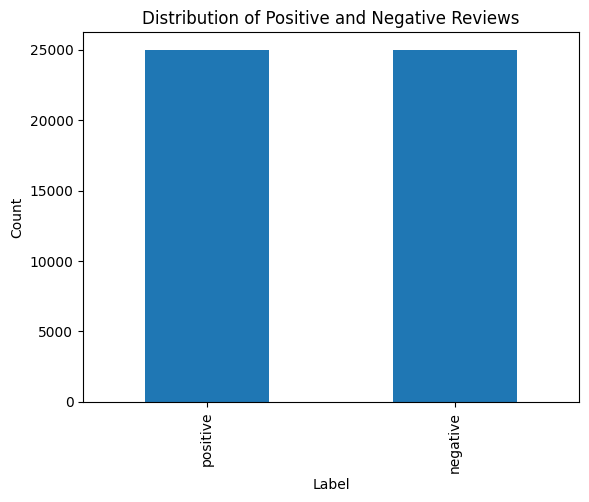

In [9]:
data['sentiment'].value_counts().plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Positive and Negative Reviews')
plt.show()

In [10]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [11]:
def data_prep(text):
  #Retains the alphabets only and replace the special characters with space
  text = re.sub('[^a-zA-Z]',' ',text)
  #Converts the text to lowerspace
  text = text.lower()
  #Tokenize the text
  text = word_tokenize(text)
  #
  lemmatizer = nltk.WordNetLemmatizer()
  text = [lemmatizer.lemmatize(word) for word in text] # Lemmatize each word
  text = [word for word in text if word not in stopwords.words('english')]
  text = ' '.join(text)
  return text

In [12]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [36]:
#data_1 = data['review'].apply(data_prep)

In [37]:
#data_1[0]

In [4]:
vect = TfidfVectorizer()
x = vect.fit_transform(data['review'])

In [5]:
y = data['sentiment']

In [15]:
x.shape

(50000, 103122)

In [30]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Bagging (Random Forest)
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
print("Random Forest:")
print("Confusion Matrix:", confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))


# Boosting (Gradient Boosting)
from sklearn.ensemble import GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(X_train, y_train)
y_pred_gb = gb_classifier.predict(X_test)
print("Gradient Boosting:")
print("Confusion Matrix:", confusion_matrix(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))
print("Accuracy:", accuracy_score(y_test, y_pred_gb))

Random Forest:
Confusion Matrix: [[4240  721]
 [ 752 4287]]
              precision    recall  f1-score   support

    negative       0.85      0.85      0.85      4961
    positive       0.86      0.85      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

Accuracy: 0.8527
Gradient Boosting:
Confusion Matrix: [[3792 1169]
 [ 680 4359]]
              precision    recall  f1-score   support

    negative       0.85      0.76      0.80      4961
    positive       0.79      0.87      0.83      5039

    accuracy                           0.82     10000
   macro avg       0.82      0.81      0.81     10000
weighted avg       0.82      0.82      0.81     10000

Accuracy: 0.8151


In [31]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Embedding, LSTM, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

In [10]:
max_words = 10000 #Maximum number of words to keep
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data['review'])
sequences = tokenizer.texts_to_sequences(data['review'])

In [7]:
tokenizer.word_index

{'the': 1,
 'and': 2,
 'a': 3,
 'of': 4,
 'to': 5,
 'is': 6,
 'br': 7,
 'in': 8,
 'it': 9,
 'i': 10,
 'this': 11,
 'that': 12,
 'was': 13,
 'as': 14,
 'for': 15,
 'with': 16,
 'movie': 17,
 'but': 18,
 'film': 19,
 'on': 20,
 'not': 21,
 'you': 22,
 'are': 23,
 'his': 24,
 'have': 25,
 'be': 26,
 'one': 27,
 'he': 28,
 'all': 29,
 'at': 30,
 'by': 31,
 'an': 32,
 'they': 33,
 'so': 34,
 'who': 35,
 'from': 36,
 'like': 37,
 'or': 38,
 'just': 39,
 'her': 40,
 'out': 41,
 'about': 42,
 'if': 43,
 "it's": 44,
 'has': 45,
 'there': 46,
 'some': 47,
 'what': 48,
 'good': 49,
 'when': 50,
 'more': 51,
 'very': 52,
 'up': 53,
 'no': 54,
 'time': 55,
 'my': 56,
 'even': 57,
 'would': 58,
 'she': 59,
 'which': 60,
 'only': 61,
 'really': 62,
 'see': 63,
 'story': 64,
 'their': 65,
 'had': 66,
 'can': 67,
 'me': 68,
 'well': 69,
 'were': 70,
 'than': 71,
 'much': 72,
 'we': 73,
 'bad': 74,
 'been': 75,
 'get': 76,
 'do': 77,
 'great': 78,
 'other': 79,
 'will': 80,
 'also': 81,
 'into': 82,
 'p

In [8]:
#Unique words(vocabs)
len(tokenizer.word_index)

124259

In [9]:
sequences

[[27,
  4,
  1,
  79,
  2102,
  45,
  1072,
  12,
  100,
  147,
  39,
  307,
  3184,
  398,
  474,
  26,
  3195,
  33,
  23,
  203,
  14,
  11,
  6,
  621,
  48,
  596,
  16,
  68,
  7,
  7,
  1,
  86,
  148,
  12,
  3241,
  68,
  42,
  3184,
  13,
  92,
  5398,
  2,
  134,
  4,
  570,
  60,
  268,
  8,
  203,
  36,
  1,
  661,
  139,
  1740,
  68,
  11,
  6,
  21,
  3,
  119,
  15,
  1,
  7888,
  2333,
  38,
  11,
  119,
  2595,
  54,
  5911,
  16,
  5510,
  5,
  1479,
  376,
  38,
  570,
  92,
  6,
  3804,
  8,
  1,
  360,
  356,
  4,
  1,
  661,
  7,
  7,
  9,
  6,
  433,
  3184,
  14,
  12,
  6,
  1,
  358,
  5,
  1,
  6813,
  2538,
  1064,
  9,
  2711,
  1421,
  20,
  538,
  32,
  4636,
  2468,
  4,
  1,
  1208,
  117,
  29,
  1,
  7017,
  25,
  2970,
  2,
  391,
  34,
  6,
  21,
  299,
  20,
  1,
  4910,
  7364,
  538,
  6,
  344,
  5,
  106,
  8161,
  5050,
  7889,
  2453,
  2,
  51,
  34,
  327,
  9106,
  7365,
  2,
  8697,
  23,
  110,
  225,
  243,
  7,
  7,
  10,
  58,
  131

In [11]:
max_length = 100
x = pad_sequences(sequences,maxlen=max_length)

In [12]:
x.shape

(50000, 100)

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=123)

In [14]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(40000, 100)
(10000, 100)
(40000,)
(10000,)


In [28]:
# convert sentiment to numerical values (0 for positive and 1 for negative)
y_train = [1 if sentiment == 'negative' else 0 for sentiment in y_train]
y_test = [1 if sentiment == 'negative' else 0 for sentiment in y_test]
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [32]:
model = Sequential()
model.add(Embedding(input_dim=max_words,output_dim=100,input_length=max_length))
model.add(SimpleRNN(units=64))
model.add(Dense(units=2,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [33]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [34]:
hist = model.fit(x_train,y_train,epochs=50,batch_size=32,validation_data=(x_test,y_test))

Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.7025 - loss: 0.5469 - val_accuracy: 0.8202 - val_loss: 0.4212
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.8665 - loss: 0.3205 - val_accuracy: 0.8172 - val_loss: 0.4315
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.8508 - loss: 0.3441 - val_accuracy: 0.7554 - val_loss: 0.5172
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.8547 - loss: 0.3380 - val_accuracy: 0.7151 - val_loss: 0.5731
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.7899 - loss: 0.4509 - val_accuracy: 0.7560 - val_loss: 0.5656
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.8311 - loss: 0.3841 - val_accuracy: 0.7626 - val_loss: 0.5586
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.8751 - loss: 0.3011 - val_accuracy: 0.7493 - val_loss: 0.6132
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.8673 -

In [38]:
import gradio as gr

def predict_sentiment(text):
  text_cleaned = data_prep(text)
  sequences = tokenizer.texts_to_sequences([text_cleaned])
  padded_sequences = pad_sequences(sequences, maxlen=max_length)
  prediction = model.predict(padded_sequences)[0]
  sentiment = "Negative" if argmax(prediction) == 1 else "Positive"
  return sentiment

iface = gr.Interface(
    fn=predict_sentiment,
    inputs=gr.Textbox(lines=5, label="Enter your text message here:"),
    outputs="text",
    title="Sentiment Classifier with RNN",
    description="Enter your text message and the model will predict if it is positive or negative."
)

iface.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://31f5dbb625a373cd3d.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [39]:
# Get predictions on the test set
y_pred_rnn = model.predict(x_test)
y_pred_rnn_classes = np.argmax(y_pred_rnn, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test_classes, y_pred_rnn_classes)
print("RNN Accuracy:", accuracy)

# Calculate confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_rnn_classes)
print("Confusion Matrix:\n", cm)

# Calculate classification report
cr = classification_report(y_test_classes, y_pred_rnn_classes)
print("Classification Report:\n", cr)


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
RNN Accuracy: 0.6572
Confusion Matrix:
 [[3313 1708]
 [1720 3259]]
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.66      0.66      5021
           1       0.66      0.65      0.66      4979

    accuracy                           0.66     10000
   macro avg       0.66      0.66      0.66     10000
weighted avg       0.66      0.66      0.66     10000

